EDA(Exploratory Data Analysis)

- 데이터의 실질적인 분석 및 데이터를 활용한 작업 이전에 데이터의 분포 등 대략적인 정보를 파악하기 위한 작업

- 데이터를 탐색하는 과정

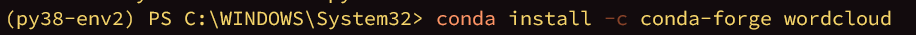

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### 데이터 다운로드  
1. 다운로드 주소  
- https://github.com/e9t/nsmc  
2. 파일 구성  
- ratings.txt : 전체 리뷰를 모아둔 데이터, 전체 20만 개의 데이터로 구성됨  
- ratings_train.txt : 학습 데이터, 총 15만 개의 데이터로 구성  
- ratings_test.txt : 평가 데이터, 총 5만 개의 데이터로 구성

In [3]:
DATA_IN_PATH = './data-in/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt',
                        delimiter='\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
print('total size', len(train_data))

total size 150000


In [5]:
train_length = train_data['document'].astype(str).apply(len)
train_length.head() # 글자수! 단어수 아님

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

In [ ]:
train_length = train_data['document'].astype(str).apply(len)
train_length.head() # 글자수! 단어수 아님

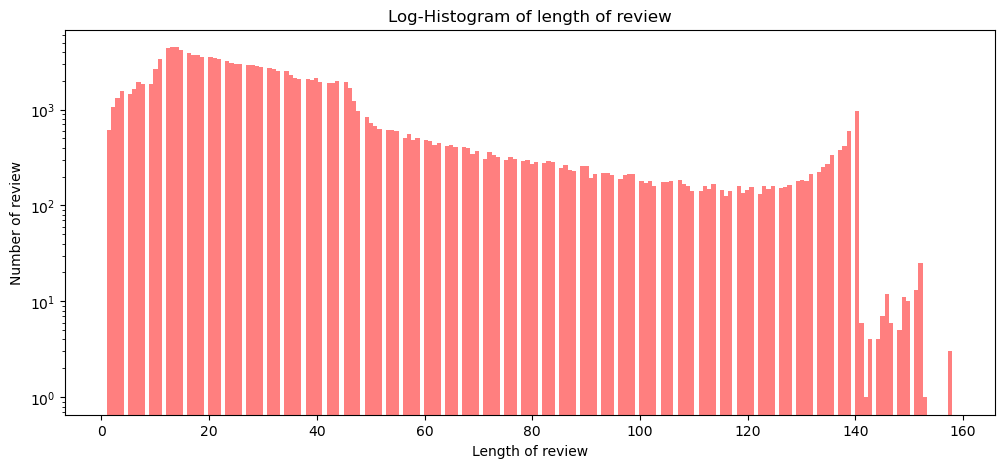

In [6]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r')
plt.yscale('log', nonpositive='clip')
#non-positive values in y can be clipped to a very small positive number
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')
plt.show()

- 짧은 길이부터 140자까지 고르게 분포되어 있음  
- 20자 이하에 많이 분포되어 있다가 길이가 길어질 수록 점점 적어지다가 140자 부근에서 갑자기 많아짐  
- 140자 제한(한글 기준)이 있는 데이터이기 때문

In [7]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 158
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간 값: 27.0
리뷰 길이 제 1 사분위: 16.0
리뷰 길이 제 3 사분위: 42.0


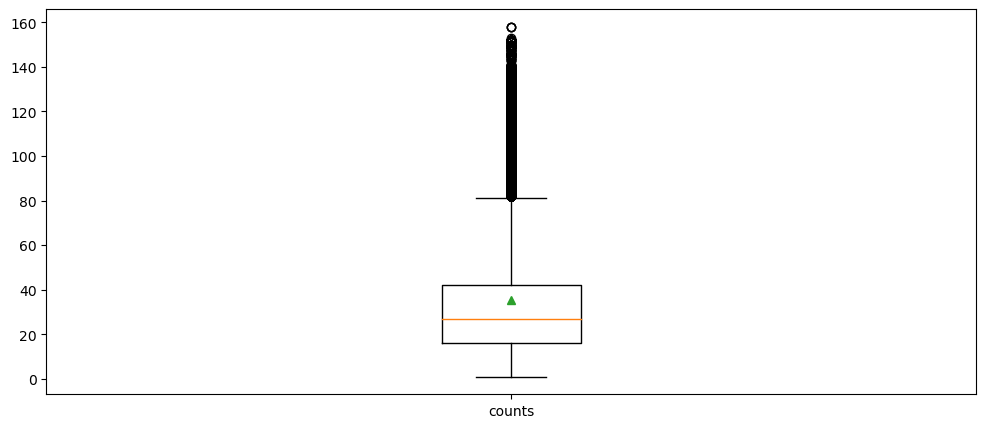

In [8]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함\
# 녹색이 35

plt.boxplot(train_length, labels=['counts'], showmeans=True)
plt.show()

- 길이가 긴 데이터가 꽤 존재함  
- 중간값과 평균값은 아래쪽에 위치  
- 워드클라우드를 이용해 자주 사용된 어휘 알아보기  
- 사전 작업으로, 데이터 안에 들어 있는 문자열이 아닌 데이터는 모두 제거함

In [9]:
train_review = [review for review in train_data['document']
               if type(review) is str]

(-0.5, 399.5, 199.5, -0.5)

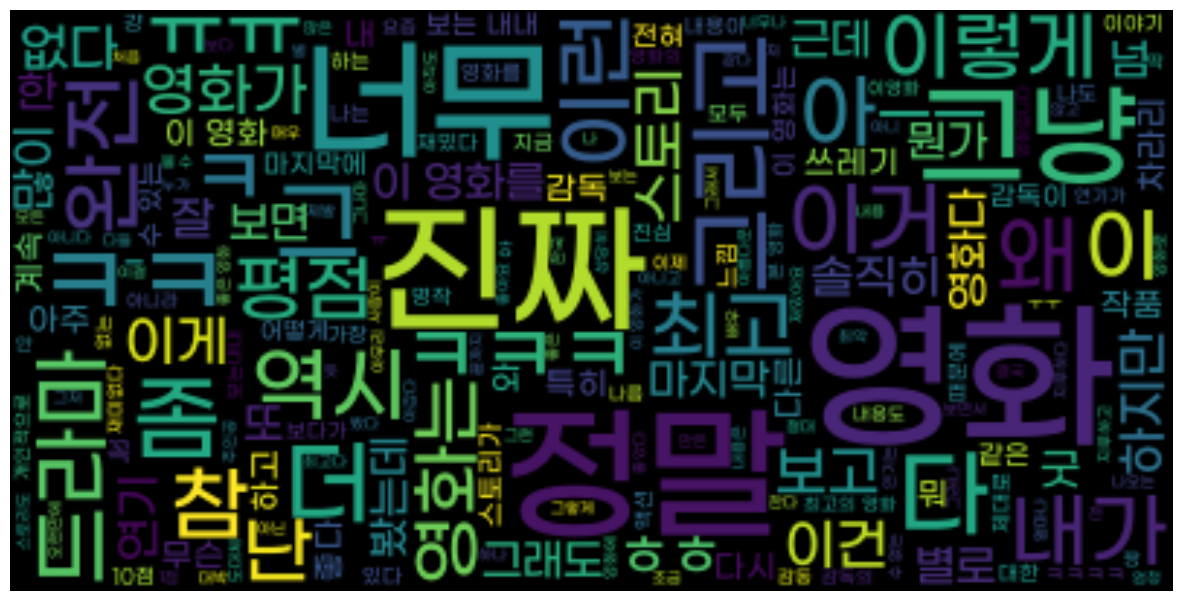

In [17]:
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'GmarketSansMedium.otf')\
.generate(' '.join(train_review))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

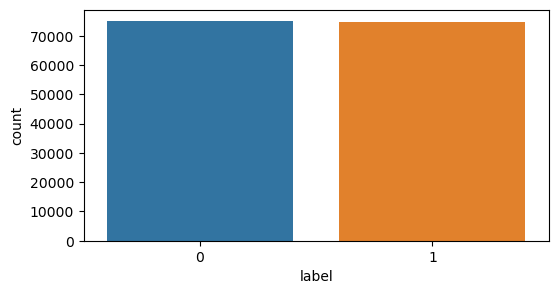

In [18]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['label'])
plt.show()

In [19]:
print("긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


- 각 리뷰의 단어 수 확인  
- 각 데이터를 띄어쓰기 기준으로 나눠서 그 개수를 하나의 변수로 할당, 히스토그램 표시

In [20]:
train_word_counts = train_data['document'].astype(str)\
.apply(lambda x:len(x.split(' ')))

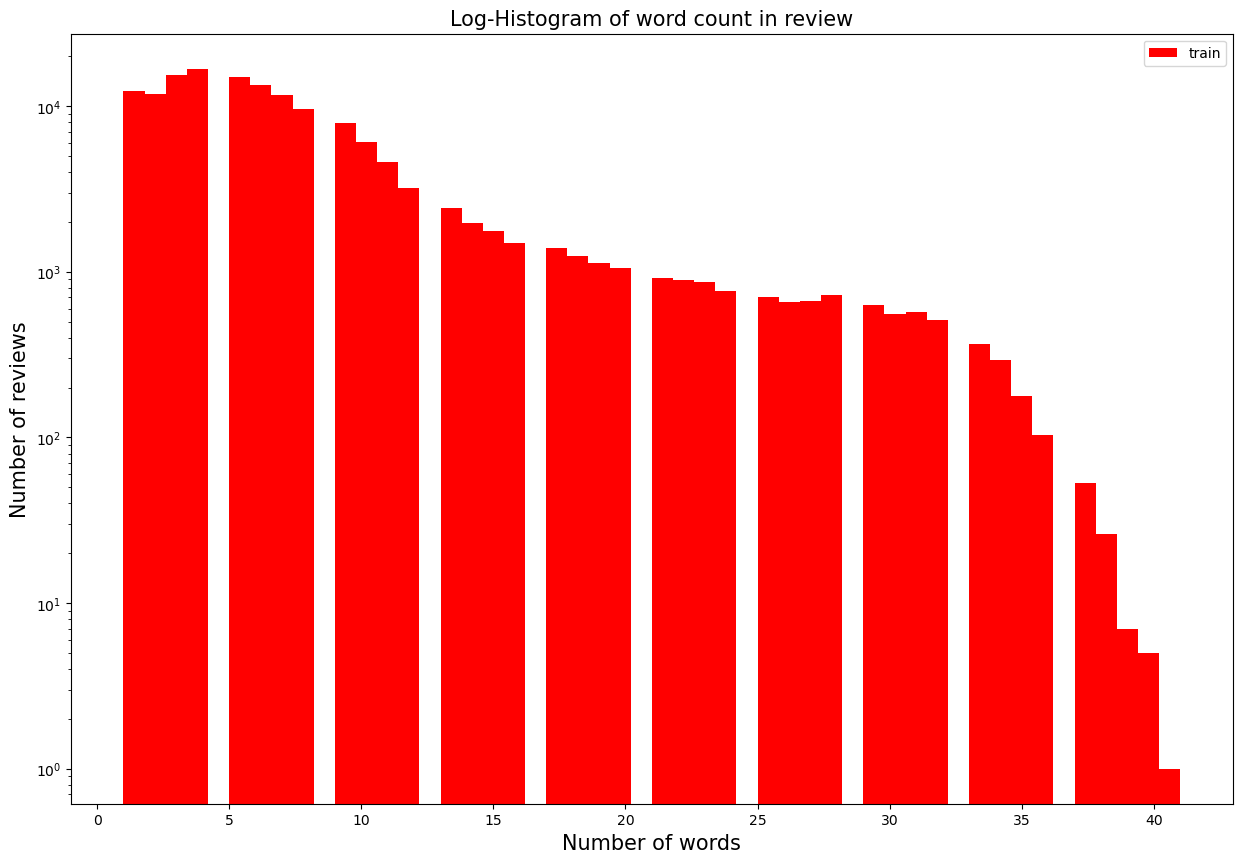

In [21]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)
plt.show()

- 갈이의 경우 대부분 5개 정도에 분포되어 있음  
- 30개 이상의 데이터부터는 수가 급격히 줄어듬

In [22]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 41
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간 값: 6.0
리뷰 단어 개수 제 1 사분위: 3.0
리뷰 단어 개수 제 3 사분위: 9.0


- 평균 7 ~ 8 개 정도의 단어 수를 가지고 있고, 중간값의 경우 6개 정도의 단어를 가지고 있음  
- 글자 수 제한때문에 영어 데이터에 비해 길이가 짧음  
- 이 경우 모델에 적용할 최대 단어수를 6개가 아닌 7개로 설정해도 큰 무리가 없음 (6~7)
- 각 데이터에 대해 특수문자 유무를 확인  
- 리뷰에 자주 사용되는 특별한 특수문자는 없으므로 일반적인 마침표와 물음표만 확인

In [26]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) 
# 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표
heart = np.mean(train_data['document'].astype(str).apply(lambda x: '♥' in x)) 

print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('하트가 있는 질문: {:.2f}%'.format(heart * 100))

물음표가있는 질문: 8.25%
마침표가 있는 질문: 51.76%
하트가 있는 질문: 0.53%


In [59]:
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [30]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


- 영어 리뷰와 달리 중간에 HTML 태그가 보이지 않음(BeautifulSoup을 이용한 태그 제거는 불필요)  
- 특수문자는 문제가 될 수 있음, 첫 번째 리뷰를 다음의 정규표현식을 이용해 한글 문자가 아닌 것들을 모두 제거함

In [33]:
#정규표현식..
# 가-힣까지 ㅏ - ㅣ 까지 "" 삭제를 의미
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", train_data['document'][0])
#모든 한글, 자음, 모음, 공백을 제외한 모든 것을 삭제
print(review_text)

아 더빙 진짜 짜증나네요 목소리


- 이렇게 처리된 문장에서 불용어를 제거하기 위해 문장을 단어로 나눠야 함  
- KoNLPy 라이브러리의 okt 객체를 사용  
- 형태소 분석기를 사용할 때 어간 추출을 사용해 어간이 추출된 단어로 나눔

In [34]:
okt = Okt()
review_text = okt.morphs(review_text, stem = True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [37]:
stop_words = set(['은','는','이','가','하','아','것',
                 '들','의','있','되','수','보','주','등','한'])

clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['더빙', '진짜', '짜증나다', '목소리']


In [49]:
def preprocessing(review, okt, remove_stopwords=False, stop_words=[]):
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    word_review = okt.morphs(review_text, stem = True)
    if remove_stopwords:
        word_review = [token for token in word_review \
                       if not token in stop_words]
        
    return word_review

In [50]:
from tqdm.notebook import tqdm

In [51]:
clean_train_review = []
for review in tqdm(train_data['document']):
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt,
                                               remove_stopwords=True,
                                               stop_words=stop_words))
        
    else:
        clean_train_review.append([])
        
print(clean_train_review[:20])

  0%|          | 0/150000 [00:00<?, ?it/s]

[['더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'], ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'], ['사이', '몬페', '그', '익살스럽다', '연기', '돋보이다', '영화', '스파이더맨', '에서', '늙다', '보이다', '하다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다'], ['막', '걸음', '마', '떼다', '세', '부터', '초등학교', '학년', '생인', '살다', '영화', 'ㅋㅋㅋ', '별', '반개', '도', '아깝다', '움'], ['원작', '긴장감', '을', '제대로', '살리다', '하다'], ['별', '반개', '도', '아깝다', '욕', '나오다', '이응경', '길용우', '연', '기', '생활', '몇', '년', '인지', '정말', '발', '로', '해도', '그것', '보단', '낫다', '납치', '감금', '만', '반복', '반복', '드라마', '가족', '도', '없다', '연기', '못', '하다', '사람', '만', '모', '엿', '네'], ['액션', '없다', '재미', '있다', '몇', '안되다', '영화'], ['왜케', '평점', '낮다', '꽤', '볼', '만', '데', '헐리우드', '식', '화려하다', '너무', '길들이다', '있다'], ['걍', '인피니트', '짱', '이다', '진짜', '짱', '이다'], ['볼때', '마다', '눈물나다', '죽다', '년대', '향수', '자', '극', '허진호', '감성', '절제', '멜로', '달인', '이다'], ['울면', '서', '손', '고', '횡단보도', '건너다', '때', '뛰다', '치다', '올', '뻔', '이

In [52]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt',
                        delimiter='\t', quoting=3)

clean_test_review = []
for review in tqdm(test_data['document']):
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt,
                                               remove_stopwords=True,
                                               stop_words=stop_words))
        
    else:
        clean_test_review.append([])
        
print(clean_test_review[:20])

  0%|          | 0/50000 [00:00<?, ?it/s]

[['굳다', 'ㅋ'], [], ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'], ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'], ['만', '아니다', '별', '다섯', '개', '주다', '왜', '로', '나오다', '제', '심기', '를', '불편하다', '하다'], ['음악', '주가', '되다', '최고', '음악', '영화'], ['진정하다', '쓰레기'], ['마치', '미국', '애니', '에서', '튀어나오다', '창의력', '없다', '로봇', '디자인', '부터가', '고개', '를', '젖다', '하다'], ['갈수록', '개판', '되다', '중국영화', '유치하다', '내용', '없다', '폼', '잡다', '끝나다', '말', '도', '안되다', '무기', '에', '유치하다', '남무', '그리다', '동사서독', '같다', '영화', '이건', '류', '류작', '이다'], ['이별', '아픔', '뒤', '에', '찾아오다', '새롭다', '인연', '기쁨', '모든', '사람', '그렇다', '않다'], ['괜찮다', '오랜', '만', '포켓몬스터', '잼밌', '어', '요'], ['한국', '독립영화', '한계', '그렇게', '아버지', '되다', '비교', '되다'], ['청춘', '아름답다', '그', '아름답다', '움', '이성', '을', '흔들다', '놓다', '찰나', '아름답다', '움', '을', '자다', '포착', '섬세하다', '아름답다', '수채화', '같다', '퀴어', '영화', '이다'], ['눈', '에', '보이다', '반전', '이다', '영화', '흡인', '력', '사라지다', '않다'], ['스토리', '연출', '연기', '비주', '얼', '영화', '기본', '조차', '안되다', '영화', '에', '무슨', '평', '을', '해', '이렇다', 

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)
word_vocab = tokenizer.word_index

In [61]:
print(word_vocab['포켓몬스터']) #단어사전

7394


In [62]:
MAX_SEQUENCE_LENGTH = 8
train_input = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH,
                           padding='post')

train_labels = np.array(train_data['label'])

test_input = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH,
                           padding='post')

test_labels = np.array(test_data['label'])

In [63]:
DATA_IN_PATH = './data-in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'nsmc_data_configs.json'

data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [67]:
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_input)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_input)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'),
         ensure_ascii=False)